In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = 'Depression.csv'

df = pd.read_csv(data)

In [3]:
df.shape

(908, 21)

In [4]:
df.head()

,Timestamp,Year,Feelings,Scale,Gender,Age,Location,Relationship,Finance,Adjustment,...,Study_pressure,Result,Living,Support,Social_media,Inferiority,Meal,Sick,Recreation,Sleep
0,11/29/2020 10:08:31,1st year,Good,70,Male,18,Hall-Mess,Single,Yes,3,...,No,No,No,Family,Yes,No,Yes,No,Yes,8
1,11/29/2020 10:11:20,1st year,Normal,60,Male,18,Hall-Mess,Single,Yes,3,...,Yes,No,No,Family,No,No,Yes,No,Yes,10
2,11/29/2020 11:10:42,2nd year,Good,70,Male,19,Hall-Mess,Single,Yes,4,...,Yes,Yes,Yes,Family,Yes,No,No,No,Yes,8
3,11/29/2020 11:21:29,2nd year,Normal,50,Male,19,Department,Single,Yes,2,...,Yes,No,Yes,Family,No,No,No,Yes,No,6
4,11/29/2020 11:22:51,1st year,Good,90,Male,18,Home,Single,Yes,2,...,No,Yes,Yes,Family,Yes,No,Yes,No,Yes,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
Timestamp         908 non-null object
Year              908 non-null object
Feelings          908 non-null object
Scale             908 non-null int64
Gender            908 non-null object
Age               908 non-null int64
Location          908 non-null object
Relationship      908 non-null object
Finance           908 non-null object
Adjustment        908 non-null int64
Understanding     908 non-null object
Study_pressure    908 non-null object
Result            908 non-null object
Living            908 non-null object
Support           908 non-null object
Social_media      908 non-null object
Inferiority       908 non-null object
Meal              908 non-null object
Sick              908 non-null object
Recreation        908 non-null object
Sleep             908 non-null int64
dtypes: int64(4), object(17)
memory usage: 149.0+ KB


In [6]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Timestamp         0
Year              0
Feelings          0
Scale             0
Gender            0
Age               0
Location          0
Relationship      0
Finance           0
Adjustment        0
Understanding     0
Study_pressure    0
Result            0
Living            0
Support           0
Social_media      0
Inferiority       0
Meal              0
Sick              0
Recreation        0
Sleep             0
dtype: int64

In [9]:
df.describe()

,Scale,Age,Adjustment,Sleep
count,908.000000,908.000000,908.000000,908.000000
mean,48.948238,20.457048,2.976872,4.733480
std,28.741914,1.213360,1.415193,2.243084
min,5.000000,18.000000,1.000000,1.000000
25%,25.000000,19.000000,2.000000,3.000000
50%,50.000000,20.000000,3.000000,5.000000
75%,75.000000,21.000000,4.000000,6.000000
max,100.000000,23.000000,5.000000,10.000000


,Feelings,Count,Relationship
0,Bad,205,1
1,Good,137,4
2,Normal,200,4
3,Very bad,169,2
4,Very good,197,5


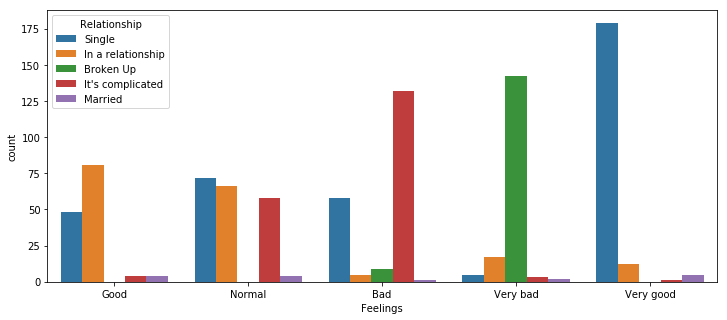

In [10]:
# Creating frequency table
freq_table = df.groupby(['Feelings']).size().reset_index(name='Count')
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == "Single")].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == "In a relationship")].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == "Broken up")].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == "It's complicated")].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == "Married")].count())

plt.figure(figsize=(12, 5))
sns.countplot(x='Feelings', data=df, hue='Relationship')
freq_table

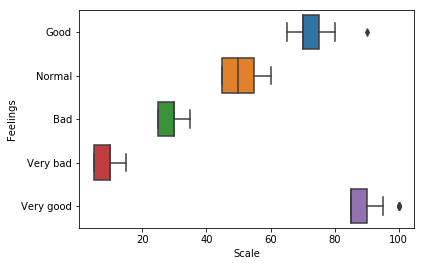

In [11]:
sns.boxplot(x="Scale",y="Feelings",data=df)

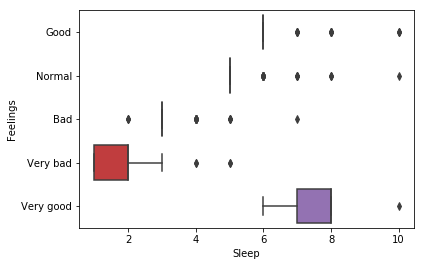

In [12]:
sns.boxplot(x="Sleep",y="Feelings",data=df)

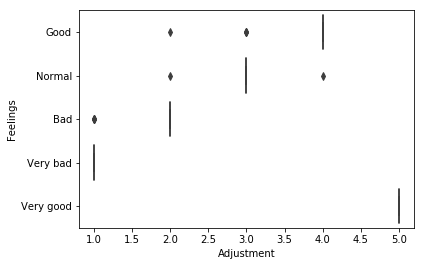

In [13]:
sns.boxplot(x="Adjustment",y="Feelings",data=df)

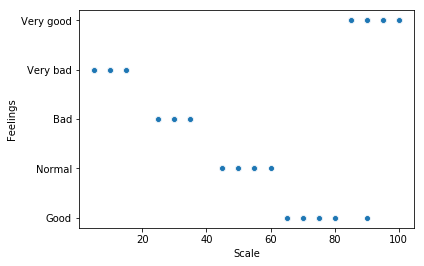

In [14]:
sns.scatterplot(x=df['Scale'], y=df['Feelings'])

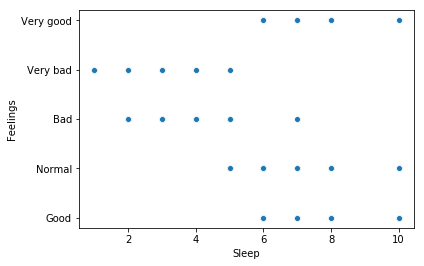

In [15]:
sns.scatterplot(x=df['Sleep'], y=df['Feelings'])

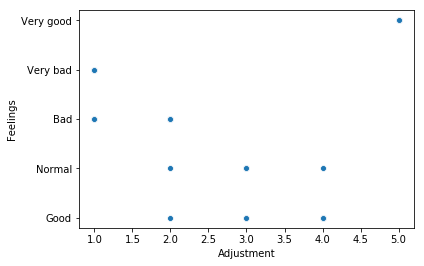

In [16]:
sns.scatterplot(x=df['Adjustment'], y=df['Feelings'])

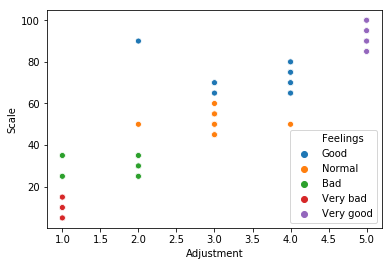

In [17]:
sns.scatterplot(x=df['Adjustment'], y=df['Scale'], hue=df['Feelings'])

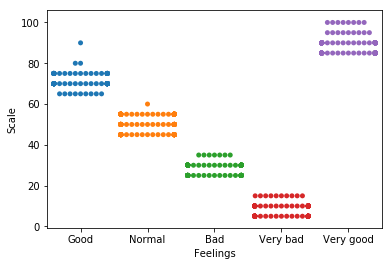

In [18]:
sns.swarmplot(x=df['Feelings'],y=df['Scale'])

In [19]:
df.drop(['Meal','Timestamp','Year','Age','Gender','Location','Social_media','Support','Recreation'],axis=1,inplace=True)

In [20]:
df.head()

,Feelings,Scale,Relationship,Finance,Adjustment,Understanding,Study_pressure,Result,Living,Inferiority,Sick,Sleep
0,Good,70,Single,Yes,3,Good,No,No,No,No,No,8
1,Normal,60,Single,Yes,3,Good,Yes,No,No,No,No,10
2,Good,70,Single,Yes,4,Good,Yes,Yes,Yes,No,No,8
3,Normal,50,Single,Yes,2,Good,Yes,No,Yes,No,Yes,6
4,Good,90,Single,Yes,2,Good,No,Yes,Yes,No,No,10


In [21]:
import category_encoders as ce

In [22]:
encoder = ce.OrdinalEncoder(cols=['Feelings','Relationship','Finance','Understanding','Study_pressure','Result','Living','Inferiority','Sick'])

df = encoder.fit_transform(df)

In [23]:
df.head()

,Feelings,Scale,Relationship,Finance,Adjustment,Understanding,Study_pressure,Result,Living,Inferiority,Sick,Sleep
0,1,70,1,1,3,1,1,1,1,1,1,8
1,2,60,1,1,3,1,2,1,1,1,1,10
2,1,70,1,1,4,1,2,2,2,1,1,8
3,2,50,1,1,2,1,2,1,2,1,2,6
4,1,90,1,1,2,1,1,2,2,1,1,10


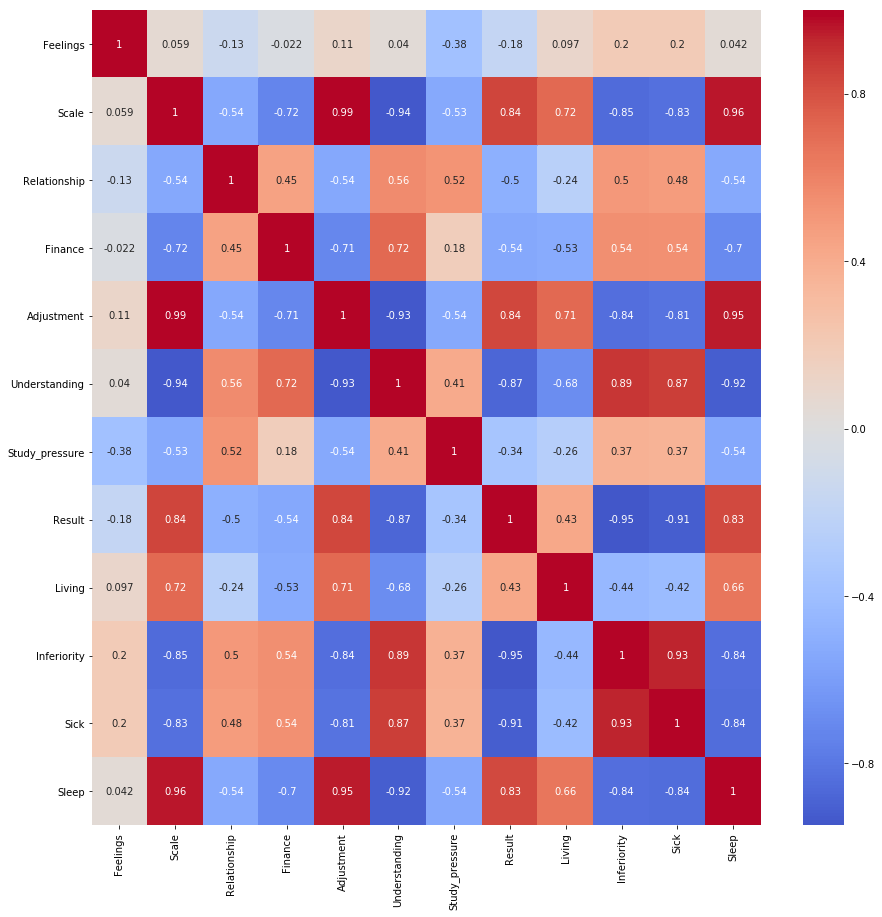

In [24]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='coolwarm',center=0) 

In [25]:
status = pd.get_dummies(df['Relationship'],drop_first=True)
status1 = pd.get_dummies(df['Finance'],drop_first=True)
status2 = pd.get_dummies(df['Understanding'],drop_first=True)
status3 = pd.get_dummies(df['Study_pressure'],drop_first=True)
status4 = pd.get_dummies(df['Result'],drop_first=True)
status5 = pd.get_dummies(df['Living'],drop_first=True)
status6 = pd.get_dummies(df['Inferiority'],drop_first=True)
status7 = pd.get_dummies(df['Sick'],drop_first=True)

In [26]:
status.head()

,2,3,4,5
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [27]:
status=status.rename(columns={1 :'Single', 2 : 'In_a_relation',3:'Broken_up',4:'Complicated',5:'Married'})
status1=status1.rename(columns={1 :'Finance_Yes', 2 : 'Finance_No'})
status2=status2.rename(columns={1 :'Understanding_Good', 2 : 'Understanding_Normal',3:'Understanding_Bad'})
status3=status3.rename(columns={1 :'Study_pressure_No', 2 : 'Study_pressure_Yes'})
status4=status4.rename(columns={1 :'Result_No', 2 : 'Result_Yes'})
status5=status5.rename(columns={1 :'Living_No', 2 : 'Living_Yes'})
status6=status6.rename(columns={1 :'Inferiority_No', 2 : 'Inferiority_Yes'})
status7=status7.rename(columns={1 :'Sick_No', 2 : 'Sick_Yes'})

In [28]:
status.head()

,In_a_relation,Broken_up,Complicated,Married
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [29]:
df = pd.concat([df, status], axis = 1)
df = pd.concat([df, status1], axis = 1)
df = pd.concat([df, status2], axis = 1)
df = pd.concat([df, status3], axis = 1)
df = pd.concat([df, status4], axis = 1)
df = pd.concat([df, status5], axis = 1)
df = pd.concat([df, status6], axis = 1)
df = pd.concat([df, status7], axis = 1)

In [30]:
df.head()

,Feelings,Scale,Relationship,Finance,Adjustment,Understanding,Study_pressure,Result,Living,Inferiority,...,Complicated,Married,Finance_No,Understanding_Normal,Understanding_Bad,Study_pressure_Yes,Result_Yes,Living_Yes,Inferiority_Yes,Sick_Yes
0,1,70,1,1,3,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,60,1,1,3,1,2,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,70,1,1,4,1,2,2,2,1,...,0,0,0,0,0,1,1,1,0,0
3,2,50,1,1,2,1,2,1,2,1,...,0,0,0,0,0,1,0,1,0,1
4,1,90,1,1,2,1,1,2,2,1,...,0,0,0,0,0,0,1,1,0,0


In [31]:
df.drop(['Relationship'], axis = 1, inplace = True)
df.drop(['Finance'], axis = 1, inplace = True)
df.drop(['Understanding'], axis = 1, inplace = True)
df.drop(['Study_pressure'], axis = 1, inplace = True)
df.drop(['Result'], axis = 1, inplace = True)
df.drop(['Living'], axis = 1, inplace = True)
df.drop(['Inferiority'], axis = 1, inplace = True)
df.drop(['Sick'], axis = 1, inplace = True)

In [32]:
df.head()

,Feelings,Scale,Adjustment,Sleep,In_a_relation,Broken_up,Complicated,Married,Finance_No,Understanding_Normal,Understanding_Bad,Study_pressure_Yes,Result_Yes,Living_Yes,Inferiority_Yes,Sick_Yes
0,1,70,3,8,0,0,0,0,0,0,0,0,0,0,0,0
1,2,60,3,10,0,0,0,0,0,0,0,1,0,0,0,0
2,1,70,4,8,0,0,0,0,0,0,0,1,1,1,0,0
3,2,50,2,6,0,0,0,0,0,0,0,1,0,1,0,1
4,1,90,2,10,0,0,0,0,0,0,0,0,1,1,0,0


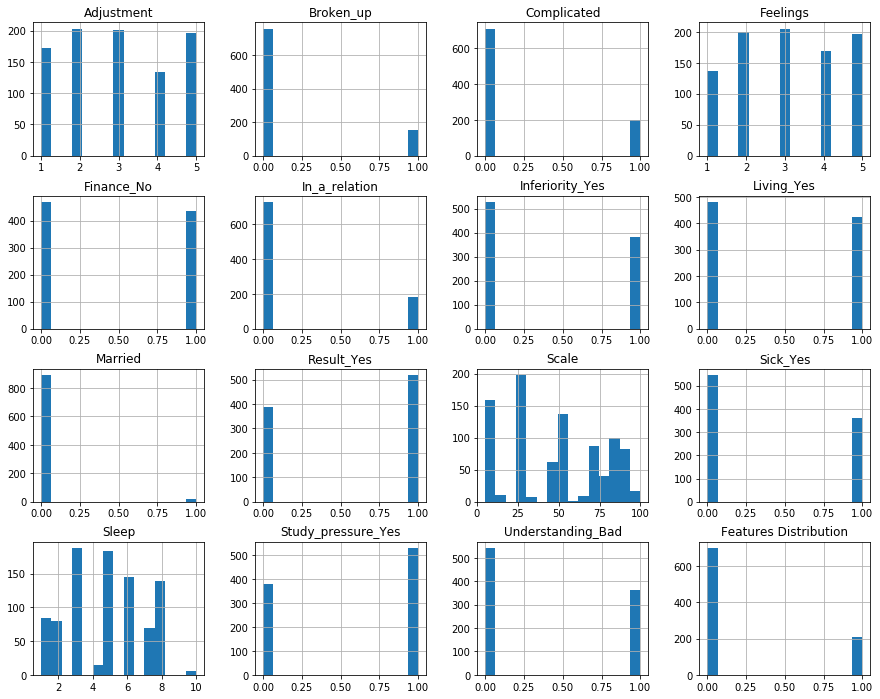

In [33]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [34]:
X = df.drop(['Feelings'], axis=1)
y = df['Feelings']

In [35]:
#def normalize (x): 
  # return ((x-np.min(x))/ (max(x) - min(x)))
                                                                                        
#X = X.apply(normalize)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 15), (182, 15), (726,), (182,))

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(32, activation='relu', kernel_initializer='normal', input_dim=15))
model.add(Dropout(rate =0.1))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dropout(rate =0.1))
model.add(Dense(6, activation='softmax', kernel_initializer='normal')) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 1,142
Trainable params: 1,142
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train, y_train,validation_split=0.33, epochs=100, batch_size=32, verbose = 1)

Train on 486 samples, validate on 240 samples
Epoch 1/100
486/486 [==============================] - 0s 463us/sample - loss: 1.7832 - acc: 0.4383 - val_loss: 1.7661 - val_acc: 0.6208
Epoch 2/100
486/486 [==============================] - 0s 70us/sample - loss: 1.7455 - acc: 0.6193 - val_loss: 1.7020 - val_acc: 0.6417
Epoch 3/100
486/486 [==============================] - 0s 55us/sample - loss: 1.6472 - acc: 0.5638 - val_loss: 1.5419 - val_acc: 0.6458
Epoch 4/100
486/486 [==============================] - 0s 55us/sample - loss: 1.4382 - acc: 0.5144 - val_loss: 1.2601 - val_acc: 0.4667
Epoch 5/100
486/486 [==============================] - 0s 60us/sample - loss: 1.1601 - acc: 0.5123 - val_loss: 1.0017 - val_acc: 0.4667
Epoch 6/100
486/486 [==============================] - 0s 57us/sample - loss: 0.9683 - acc: 0.5535 - val_loss: 0.8649 - val_acc: 0.6875
Epoch 7/100
486/486 [==============================] - 0s 49us/sample - loss: 0.8523 - acc: 0.6811 - val_loss: 0.7692 - val_acc: 0.8083
E

In [42]:
score, acc = model.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

726/726 [==============================] - 0s 58us/sample - loss: 0.0385 - acc: 0.9876
Train score: 0.038505126352386024
Train accuracy: 0.9876033


In [43]:
y_test.head(10)

865    5
439    2
342    4
736    4
785    5
837    1
523    3
265    1
903    3
735    3
Name: Feelings, dtype: int32

In [44]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred[0:10]

array([[False, False, False, False, False,  True],
       [False, False,  True, False, False, False],
       [False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       [False, False, False, False, False,  True],
       [False,  True, False, False, False, False],
       [False, False, False,  True, False, False],
       [False,  True, False, False, False, False],
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False]])

In [45]:
score, acc = model.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

182/182 [==============================] - 0s 66us/sample - loss: 0.1606 - acc: 0.9615
Test score: 0.16056244824705954
Test accuracy: 0.96153843


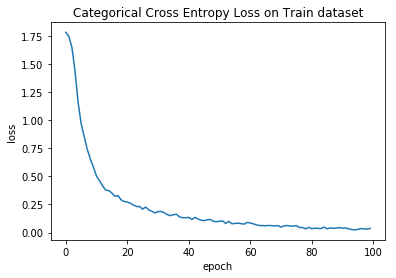

In [46]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Categorical Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

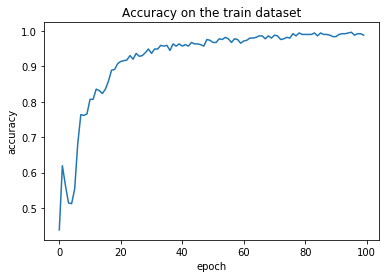

In [47]:
# Plotting accuracy metric
plt.plot(history.history['acc'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

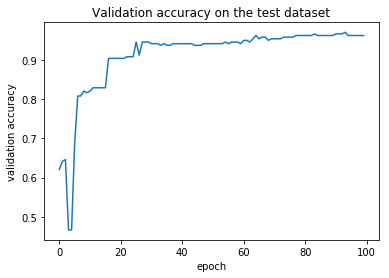

In [48]:
plt.plot(history.history['val_acc'])
plt.title('Validation accuracy on the test dataset')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.show()

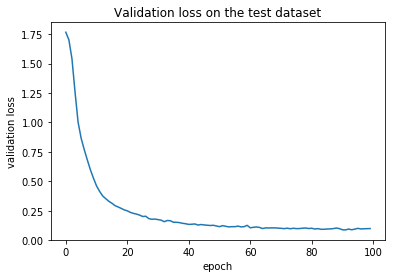

In [49]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss on the test dataset')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.show()